<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Boosting" data-toc-modified-id="Introduction-to-Boosting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Boosting</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Train-test-split-with-stratify" data-toc-modified-id="Train-test-split-with-stratify-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train test split with stratify</a></span></li><li><span><a href="#Train-Validation-with-stratify" data-toc-modified-id="Train-Validation-with-stratify-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train Validation with stratify</a></span></li><li><span><a href="#Class-Distribution" data-toc-modified-id="Class-Distribution-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Class Distribution</a></span></li><li><span><a href="#Modelling-xgboost-imbalanced-data" data-toc-modified-id="Modelling-xgboost-imbalanced-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modelling xgboost imbalanced data</a></span></li><li><span><a href="#HPO-for-imbalanced-data-using-sklearn" data-toc-modified-id="HPO-for-imbalanced-data-using-sklearn-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>HPO for imbalanced data using sklearn</a></span></li><li><span><a href="#HPO-for-imbalanced-data-using-optuna" data-toc-modified-id="HPO-for-imbalanced-data-using-optuna-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>HPO for imbalanced data using optuna</a></span><ul class="toc-item"><li><span><a href="#Optuna-Hyperparameters-Visualization" data-toc-modified-id="Optuna-Hyperparameters-Visualization-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Optuna Hyperparameters Visualization</a></span></li><li><span><a href="#Best-model-from-Optuna" data-toc-modified-id="Best-model-from-Optuna-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Best model from Optuna</a></span></li></ul></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Model Interpretation</a></span><ul class="toc-item"><li><span><a href="#Model-interpretation-using-eli5" data-toc-modified-id="Model-interpretation-using-eli5-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Model interpretation using eli5</a></span></li><li><span><a href="#Model-interpretation-using-shap" data-toc-modified-id="Model-interpretation-using-shap-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Model interpretation using shap</a></span></li></ul></li><li><span><a href="#Model-Evaluation-Using-Yellowbrick" data-toc-modified-id="Model-Evaluation-Using-Yellowbrick-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Model Evaluation Using Yellowbrick</a></span><ul class="toc-item"><li><span><a href="#class-balance" data-toc-modified-id="class-balance-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>class balance</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Classification-Report-Heatmap" data-toc-modified-id="Classification-Report-Heatmap-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Classification Report Heatmap</a></span></li><li><span><a href="#Class-Prediction-Error" data-toc-modified-id="Class-Prediction-Error-12.4"><span class="toc-item-num">12.4&nbsp;&nbsp;</span>Class Prediction Error</a></span></li><li><span><a href="#ROCAUC" data-toc-modified-id="ROCAUC-12.5"><span class="toc-item-num">12.5&nbsp;&nbsp;</span>ROCAUC</a></span></li></ul></li><li><span><a href="#Total-Time-Taken" data-toc-modified-id="Total-Time-Taken-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Total Time Taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Introduction to Boosting
References: 
- https://github.com/dmlc/xgboost/tree/master/demo/guide-python
- https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- http://xgboost.readthedocs.org/en/latest/parameter.html#general-parameters
- https://github.com/dmlc/xgboost/tree/master/demo/guide-python
- https://xgboost.readthedocs.io/en/latest/python/python_api.html

The term `Boosting` refers to a family of algorithms which converts weak learner to strong learners.

There are many boosting algorithms which impart additional boost to model’s accuracy. In this tutorial, we’ll learn about the two most commonly used algorithms i.e. Gradient Boosting (GBM) and XGboost.

Generally XGboost is considered more advanced than gbm. 
- xgboost supports regularization, however gbm does not.
- xgboost is blazingley faster than gbm.
- xgboost has built-in routine to handle missing values.
- xgboost has tree pruning mechanisms,however gbm and random forest are greedy algorithms and do not have tree pruning.
- In xgboost we can run cross-validation at each iteration of the boosting. But in gbm, we have to run grid search.

# Imports

In [1]:
import time
notebook_start_time = time.time()

In [2]:
# private module
import bhishan
from bhishan import bp

In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


SEED = 100
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams.update({'font.size': 16})
plt.style.use('ggplot')
%matplotlib inline

sns.set(color_codes=True)

import six
import pickle
import joblib
import copy
import pprint
pp = pprint.PrettyPrinter(indent=4)

# scale and split
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# sklearn scalar metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# roc auc and curves
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# xgboost
import xgboost
import xgboost as xgb
from xgboost import XGBClassifier

# hyperparameter tuning
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, STATUS_FAIL
from hyperopt.pyll import scope
from hyperopt.pyll.stochastic import sample
import optuna

# model evaluation
import shap

# eli5 0.10.1 gives deprecation
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_prediction


import scikitplot
from scikitplot import metrics as skmetrics
import yellowbrick
from yellowbrick.target import ClassBalance
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier import ConfusionMatrix

# versions
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.


Bhishan Poudel 2020-09-29 

CPython 3.7.7
IPython 7.18.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

bhishan     0.3.1
sklearn     0.23.1
scikitplot  0.3.7
joblib      0.16.0
yellowbrick 1.1
eli5        0.10.1
seaborn     0.11.0
optuna      2.0.0
shap        0.35.0
numpy       1.18.4
xgboost     1.2.0
json        2.0.9
pandas      1.1.0
six         1.15.0



# Useful Scripts

In [4]:
df_eval = pd.DataFrame({'Model': [],
                        'Description':[],
                        'Accuracy':[],
                        'Precision':[],
                        'Recall':[],
                        'F1':[],
                        'AUC':[],
                    })

# Load the data

In [5]:
ifile = '../data/raw/creditcard.csv.zip'
df = pd.read_csv(ifile,compression='zip')
print(df.shape)
df.head()

(284807, 31)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [6]:
target = 'Class'
df[target].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

# Train test split with stratify

In [7]:
from sklearn.model_selection import train_test_split

target = 'Class'
df_Xtrain_orig, df_Xtest, ser_ytrain_orig, ser_ytest = train_test_split(
    df.drop(target,axis=1), 
    df[target],
    test_size=0.2, 
    random_state=SEED, 
    stratify=df[target])

ytrain_orig = ser_ytrain_orig.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

# Train Validation with stratify

In [8]:
df_Xtrain, df_Xvalid, ser_ytrain, ser_yvalid = train_test_split(
    df_Xtrain_orig, 
    ser_ytrain_orig,
    test_size=0.2, 
    random_state=SEED, 
    stratify=ser_ytrain_orig)

ytrain = ser_ytrain.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

print(df_Xtrain.shape)
df_Xtrain.head()

(182276, 30)


Time        V1        V2        V3        V4        V5        V6  \
35574    38177.0  1.430419 -0.718078  0.364706 -0.744257 -0.556090  0.698948   
46862    42959.0 -2.425523 -1.790293  2.522139  0.581141  0.918453  0.594426   
181781  125124.0 -0.255451 -1.988955 -1.259725 -2.196052 -1.324357  0.004999   
218475  141330.0 -0.852000 -0.130753  1.366625 -0.375116  1.257245  0.050009   
15062    26410.0 -0.782845  0.368745  2.491474  1.601648 -0.417058  1.017225   

              V7        V8        V9  ...       V20       V21       V22  \
35574  -0.949852  0.131008 -0.314353  ...  0.158424  0.042013  0.429576   
46862   0.224541  0.373885 -0.168411  ...  0.984535  0.538438  0.877560   
181781  1.661537 -0.422359 -2.219274  ...  0.697580  0.566413  1.241385   
218475 -0.218389  0.176564  0.335049  ...  0.281607  0.277023  0.786877   
15062   0.366164  0.020070  0.037205  ...  0.168045  0.126913  0.822213   

             V23       V24       V25       V26       V27       V28  Amount  
35574  -0.301931 -0.933773  0.840490 -0.027776  0.044688 -0.007522    0.20  
46862   0.590595 -0.293545  0.524022 -0.328189 -0.205285 -0.109163  300.00  
181781  0.955373  0.460405  0.087524  0.127633 -0.104306  0.077857  502.62  
218475 -0.262423  0.097049  0.200534 -0.115078  0.141612  0.159208    4.99  
15062  -0.074362 -0.260301  0.212852  0.066400 -0.051980 -0.187419   99.00  

[5 rows x 30 columns]

# Class Distribution

In [9]:
from bhishan import bp

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


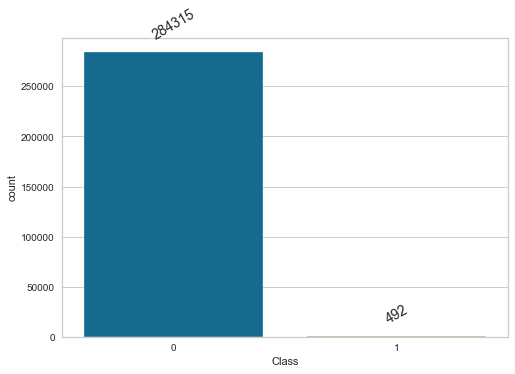

In [10]:
ax = sns.countplot(df[target])
bp.add_text_barplot(ax)

In [11]:
df[target].value_counts(normalize=True).mul(100)
# 99.8 % transaction are non-fraud
# its extremely imbalanced case.

0    99.827251
1     0.172749
Name: Class, dtype: float64

# Modelling xgboost imbalanced data
```python
Parameters:
-------------
max_depth=3
learning_rate=0.1
n_estimators=100
verbosity=1 **NOTE: it print in ipython terminal not in browser
silent=None **deprecated use verbosity
objective='binary:logistic' **for binary classification
booster='gbtree' **use default tree not linear
n_jobs=1 **make this -1
nthread=None **deprecated use n_jobs
gamma=0
min_child_weight=1
max_delta_step=0
subsample=1
colsample_bytree=1
colsample_bylevel=1
colsample_bynode=1
reg_alpha=0
reg_lambda=1
scale_pos_weight=1
base_score=0.5
random_state=0 **use your own random state
seed=None      **deprecated use random_state
missing=None
```


[early stopping xgboost official note](https://xgboost.readthedocs.io/en/latest/python/python_intro.html):  


If early stopping occurs, the model will have three additional fields: bst.best_score, bst.best_iteration and bst.best_ntree_limit.
 Note that xgboost.train() will return a model from the last iteration, not the best one.
[Example](https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py)
```python
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
        eval_set=[(X_test, y_test)])

```

In [12]:
# help(XGBClassifier)

Time taken: 1 min 14 secs


Model          Description  Accuracy  Precision    Recall        F1  \
0  Xgboost  default, imbalanced  0.999421   0.911392  0.734694  0.813559   

        AUC  
0  0.867285

[[56857     7]
 [   26    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.73      0.81        98

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



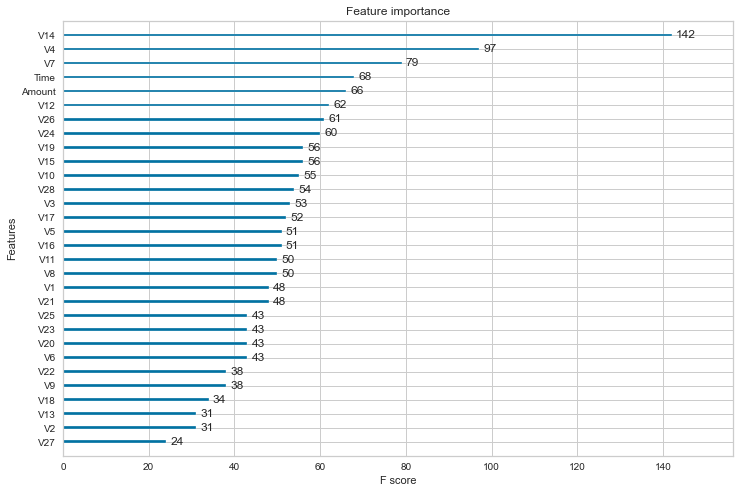

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,  precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

time_start = time.time()

# current parameters
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig
Xtx = df_Xtest
ytx = ser_ytest

Xvd = df_Xvalid
yvd = ser_yvalid

# model fit
model = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic')

model.fit(Xtr, ytr)


# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(model, Xtx, ytx, cv=skf)
ypreds = ypreds_cv



# model evaluation
average = 'binary'
row_eval = ['Xgboost','default, imbalanced', 
            accuracy_score(ytx, ypreds),
            precision_score(ytx, ypreds, average=average),
            recall_score(ytx, ypreds, average=average),
            f1_score(ytx, ypreds, average=average),
            roc_auc_score(ytx, ypreds),
       ]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

# confusion matrix
print(confusion_matrix(ytx, ypreds))
print(classification_report(ytx,ypreds))

# feature importance
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model,ax=ax)
plt.show()

[0]	validation_0-auc:0.92394
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.92394
[2]	validation_0-auc:0.92392
[3]	validation_0-auc:0.92393
[4]	validation_0-auc:0.92391
[5]	validation_0-auc:0.92390
[6]	validation_0-auc:0.92389
[7]	validation_0-auc:0.93002
[8]	validation_0-auc:0.96548
[9]	validation_0-auc:0.96549
[10]	validation_0-auc:0.97859
[11]	validation_0-auc:0.97817
[12]	validation_0-auc:0.97817
[13]	validation_0-auc:0.97952
[14]	validation_0-auc:0.97931
[15]	validation_0-auc:0.97932
[16]	validation_0-auc:0.98561
[17]	validation_0-auc:0.98572
[18]	validation_0-auc:0.99470
[19]	validation_0-auc:0.99612
[20]	validation_0-auc:0.99853
[21]	validation_0-auc:0.99916
[22]	validation_0-auc:0.99935
[23]	validation_0-auc:0.99938
[24]	validation_0-auc:0.99969
[25]	validation_0-auc:0.99987
[26]	validation_0-auc:0.99991
[27]	validation_0-auc:0.99994
[28]	validation_0-auc:0.99997
[29]	validation_0-auc:0.99998
[30]	validation_0-auc:0.99999
[31]	validation_

Model               Description  Accuracy  Precision    Recall        F1  \
0  Xgboost       default, imbalanced  0.999421   0.911392  0.734694  0.813559   
1  Xgboost  earlystop 30, imbalanced  0.999421   0.911392  0.734694  0.813559   

        AUC  
0  0.867285  
1  0.867285

[[56857     7]
 [   26    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.73      0.81        98

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



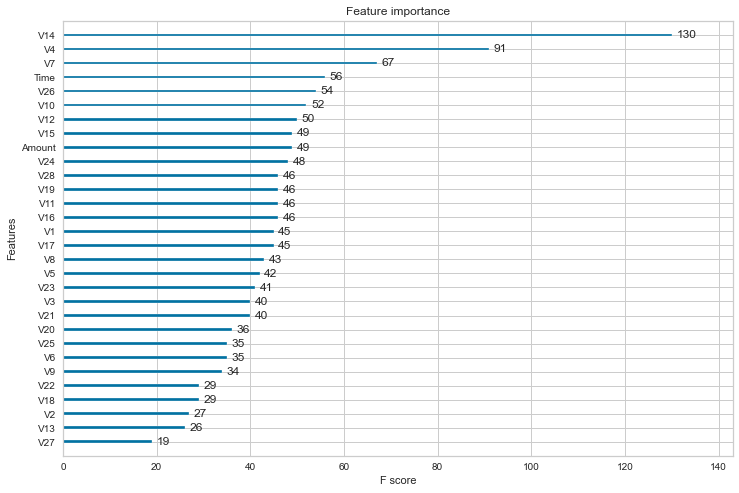

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,  precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

time_start = time.time()

# current parameters
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig
Xtx = df_Xtest
ytx = ser_ytest

Xvd = df_Xvalid
yvd = ser_yvalid

# model fit
# early stopping
model = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic')

model.fit(Xtr,ytr,
            eval_set=[(Xvd,yvd)],
            eval_metric='auc',
            early_stopping_rounds=30, # early stopping gives 
            )


# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(model, Xtx, ytx, cv=skf)
ypreds = ypreds_cv



# model evaluation
average = 'binary'
row_eval = ['Xgboost','earlystop 30, imbalanced', 
            accuracy_score(ytx, ypreds),
            precision_score(ytx, ypreds, average=average),
            recall_score(ytx, ypreds, average=average),
            f1_score(ytx, ypreds, average=average),
            roc_auc_score(ytx, ypreds),
       ]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

# confusion matrix
print(confusion_matrix(ytx, ypreds))
print(classification_report(ytx,ypreds))

# feature importance
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model,ax=ax)
plt.show()

# HPO for imbalanced data using sklearn

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic')


# define grid
weights = [1, 99.8, 1000]
param_grid = dict(scale_pos_weight=weights)


# cross validation
cv = RepeatedStratifiedKFold(n_splits=5,
                             n_repeats=2,
                             random_state=SEED)

# define grid search
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=cv,
                    scoring='roc_auc',
                    verbose=1
                   )

"""
# execute the grid search
grid_result = grid.fit(Xtr, ytr)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
""";

# HPO for imbalanced data using optuna
**Important Parameters**:

- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.


**Regularization parameters**:

- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [16]:
import optuna
optuna.logging.set_verbosity(optuna.logging.INFO)
# use INFO to see progress

In [17]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=SEED,num_eval=10,n_estimators=10)
model.fit(df_Xtrain,ser_ytrain)

ypreds = model.predict(df_Xtest)
    
score = roc_auc_score(ser_ytest.to_numpy().ravel(),
                          ypreds)

print(score)

[13:47:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { num_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8927692137631642


In [18]:
def objective(trial):

    params_xgb_optuna = {
        'eval_metric': 'auc',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1.0),
        'max_depth':trial.suggest_int('max_depth', 5, 20),
        'n_estimators': trial.suggest_int('n_estimators', 150, 1000), 
        'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 100.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 100.0),
    }

    model = XGBClassifier(random_state=SEED,scale_pos_weight=0.98, **params_xgb_optuna)
    model.fit(df_Xtrain,ser_ytrain)
    
    ypreds = model.predict(df_Xvalid)
    score = roc_auc_score(ser_yvalid.to_numpy().ravel(),
                              ypreds)
    return score

In [19]:
%%time
# NOTE: there is inherent non-determinism in optuna hyperparameter selection
#       we may not get the same hyperparameters when run twice.


sampler = optuna.samplers.TPESampler(seed=SEED)
N_TRIALS = 1 # make it large

optuna_storage = 'sqlite:///xgb_optuna_fraud_classifcation.db'
study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='xgb_optuna',
                            storage=optuna_storage,
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS)

[I 2020-09-29 13:47:44,525] Using an existing study with name 'xgb_optuna' instead of creating a new one.
[I 2020-09-29 13:50:32,600] Trial 23 finished with value: 0.9050083340058045 and parameters: {'learning_rate': 0.31222039391044565, 'max_depth': 15, 'n_estimators': 882, 'subsample': 0.8123239581810182, 'reg_alpha': 0.6625572608578612, 'reg_lambda': 0.024224582314387365}. Best is trial 11 with value: 0.911326456503168.


In [20]:
%%time
# Resume hyper parameter from last state

sampler = optuna.samplers.TPESampler(seed=SEED)
N_TRIALS = 1 # make it large

study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='xgb_optuna',
                            storage=optuna_storage,
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS,timeout=600)

[I 2020-09-29 13:50:32,899] Using an existing study with name 'xgb_optuna' instead of creating a new one.
[I 2020-09-29 13:54:56,994] Trial 24 finished with value: 0.8986682286550668 and parameters: {'learning_rate': 0.05038258367127182, 'max_depth': 19, 'n_estimators': 610, 'subsample': 0.9132101073173213, 'reg_alpha': 6.193786750301582, 'reg_lambda': 0.002119559199923406}. Best is trial 11 with value: 0.911326456503168.


In [21]:
print(f'Number of finished trials: {len(study.trials)}')

# best trail
best_trial = study.best_trial

# best params
params_best = study.best_trial.params
params_best

Number of finished trials: 25


{'learning_rate': 0.5600762010170545,
 'max_depth': 13,
 'n_estimators': 496,
 'reg_alpha': 0.007843262285909378,
 'reg_lambda': 0.00015262916250022244,
 'subsample': 0.8669082698078922}

## Optuna Hyperparameters Visualization
- https://github.com/plotly/plotly.py#jupyterlab-support-python-35

We need plotly 4 to render visulization in jupyter lab.

In [22]:
from optuna.visualization import (plot_contour,
                                  plot_optimization_history,
                                  plot_parallel_coordinate,
                                  plot_slice)

In [23]:
params=['learning_rate','max_depth',
        'n_estimators','subsample','reg_alpha','reg_lambda']
optuna.visualization.plot_contour(study,params=params)

In [24]:
plot_optimization_history(study)

In [25]:
plot_parallel_coordinate(study)

In [26]:
plot_slice(study)

## Best model from Optuna

In [28]:
# time
time_start = time.time()

model_name = 'xgboost'
desc = 'grid search optuna'
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig.to_numpy().ravel()
Xtx = df_Xtest
ytx = ser_ytest.to_numpy().ravel()
Xvd = df_Xvalid
yvd = ser_yvalid.to_numpy().ravel()

# use best model
params_best =  study.best_trial.params

model = xgb.XGBClassifier(random_state=SEED)
model.set_params(**params_best)

# fit and save the model
model.fit(Xtr, ytr)
joblib.dump(model,'../outputs/clf_xgb_grid_search_optuna.pkl')

# load the saved model
model = joblib.load('../outputs/clf_xgb_grid_search_optuna.pkl')

# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(model, Xtx, ytx, cv=skf)
ypreds = ypreds_cv

# model evaluation
average = 'binary'
row_eval = [model_name,desc, 
            accuracy_score(ytx, ypreds),
            precision_score(ytx, ypreds, average=average),
            recall_score(ytx, ypreds, average=average),
            f1_score(ytx, ypreds, average=average),
            roc_auc_score(ytx, ypreds),
            ]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

Time taken: 2 min 36 secs


Model               Description  Accuracy  Precision    Recall        F1  \
0  Xgboost       default, imbalanced  0.999421   0.911392  0.734694  0.813559   
1  Xgboost  earlystop 30, imbalanced  0.999421   0.911392  0.734694  0.813559   
2  xgboost        grid search optuna  0.999386   0.909091  0.714286  0.800000   

        AUC  
0  0.867285  
1  0.867285  
2  0.857081

In [29]:
df_eval.sort_values('Recall',ascending=False).style.background_gradient(subset='Recall')

In [30]:
cm = confusion_matrix(ytest,ypreds)
vals = cm.ravel()

print(cm)

print('xgboost Grid Search Results')
print('-'*25)
print('Total Frauds: ', vals[2] + vals[3])
print('Incorrect Frauds: ', vals[2])
print('Incorrect Percent: ', round(vals[2]*100/(vals[2]+vals[3]),2),'%')

[[56857     7]
 [   28    70]]
xgboost Grid Search Results
-------------------------
Total Frauds:  98
Incorrect Frauds:  28
Incorrect Percent:  28.57 %


In [32]:
from bhishan.bp import plotly_binary_clf_evaluation

yprobs = model.predict_proba(df_Xtest)
yprobs = yprobs[:,0] # take only first column

plotly_binary_clf_evaluation('clf_xgb_optuna',model,ytx,ypreds,yprobs,df)

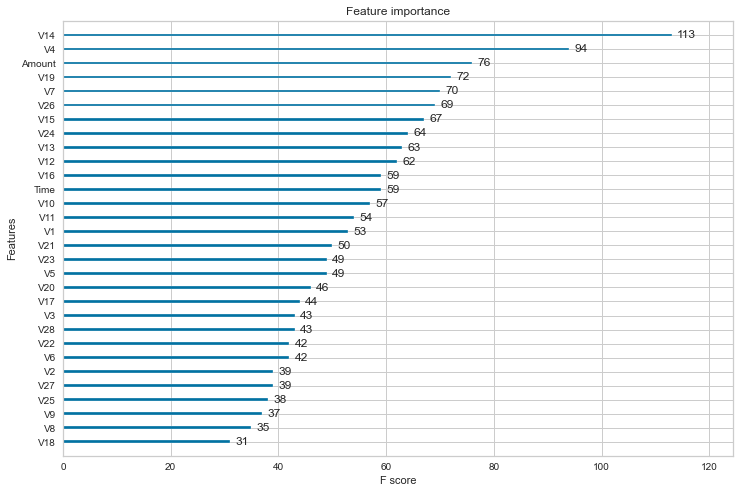

In [33]:
# feature importance
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model,ax=ax)
plt.show()

# Model Interpretation

In [34]:
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

## Model interpretation using eli5
- https://eli5.readthedocs.io/en/latest/tutorials/xgboost-titanic.html

In [35]:
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

In [36]:
import eli5

In [37]:
eli5.show_weights(model)

In [38]:
from eli5.sklearn import PermutationImportance

feature_names = df_Xtrain.columns.tolist()

perm = PermutationImportance(model).fit(df_Xtest, ytx)
eli5.show_weights(perm, feature_names=feature_names)

In [39]:
from eli5 import show_prediction
show_prediction(model, df_Xtest.iloc[0,:],
                show_feature_values=True)

## Model interpretation using shap

In [40]:
import shap
shap.initjs()

In [41]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5600762010170545, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=496, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0.007843262285909378, reg_lambda=0.00015262916250022244,
              scale_pos_weight=1, subsample=0.8669082698078922,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
params_xgb = dict(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, n_estimators=10,
              n_jobs=1, nthread=-1, num_eval=10, objective='binary:logistic',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=SEED, silent=True, subsample=1)

In [44]:
feature_names = df_Xtrain.columns.tolist()
dtrain = xgb.DMatrix(df_Xtrain, ser_ytrain,feature_names=feature_names)
dvalid = xgb.DMatrix(df_Xvalid, ser_yvalid,feature_names=feature_names)
dtest = xgb.DMatrix(df_Xtest,feature_names=feature_names)
n_rounds = 100

watchlist = [(dtrain, 'dtrain'), (dvalid, 'dvalid')]
booster = xgb.train(params_xgb,
                  dtrain,
                  n_rounds,
                  watchlist,
                  verbose_eval=10,
                  early_stopping_rounds=20)

ypreds = booster.predict(dtest)

[14:02:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators, num_eval, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	dtrain-error:0.00068	dvalid-error:0.00066
Multiple eval metrics have been passed: 'dvalid-error' will be used for early stopping.

Will train until dvalid-error hasn't improved in 20 rounds.
[10]	dtrain-error:0.00055	dvalid-error:0.00061
[20]	dtrain-error:0.00053	dvalid-error:0.00064
[30]	dtrain-error:0.00048	dvalid-error:0.00059
[40]	dtrain-error:0.00035	dvalid-error:0.00051
[50]	dtrain-error:0.00032	dvalid-error:0.00051
[60]	dtrain-error:0.00031	dvalid-error:0.00048
[70]	dtrain-error:0.00030	dvalid-error:0.00053
Stopping. Best iteration:
[53]	dtrain-error:0.00033	dvalid-error:0.00048



In [45]:
# %%time

# explainer = shap.TreeExplainer(booster_model)
# shap_values = explainer.shap_values(dtest)

# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 341: invalid start byte

In [46]:
booster.save_raw()[:100] # we need to remove string "binf"

bytearray(b'binf\x00\x00\x00?\x1e\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')

In [47]:
# https://github.com/slundberg/shap/issues/1215
model_bytearray = booster.save_raw()[4:]
booster.save_raw = lambda : model_bytearray

In [48]:
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(dtest)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [49]:
shap_values

array([[-0.01348371, -0.00225423, -0.02267851, ..., -0.00176821,
         0.0282112 , -0.04932576],
       [-0.00502768, -0.00034655,  0.0076214 , ..., -0.00788194,
         0.00289769, -0.01371603],
       [-0.00502768, -0.00034655,  0.0076214 , ..., -0.00791513,
         0.00289769,  0.01728705],
       ...,
       [-0.00502768, -0.00034655,  0.0076214 , ..., -0.00791513,
         0.00289769, -0.01665591],
       [-0.00502768, -0.00034655,  0.0076214 , ..., -0.00791513,
         0.00289769, -0.01458495],
       [-0.00502768,  0.00132875,  0.0076214 , ..., -0.00789204,
         0.00289769, -0.01628295]], dtype=float32)

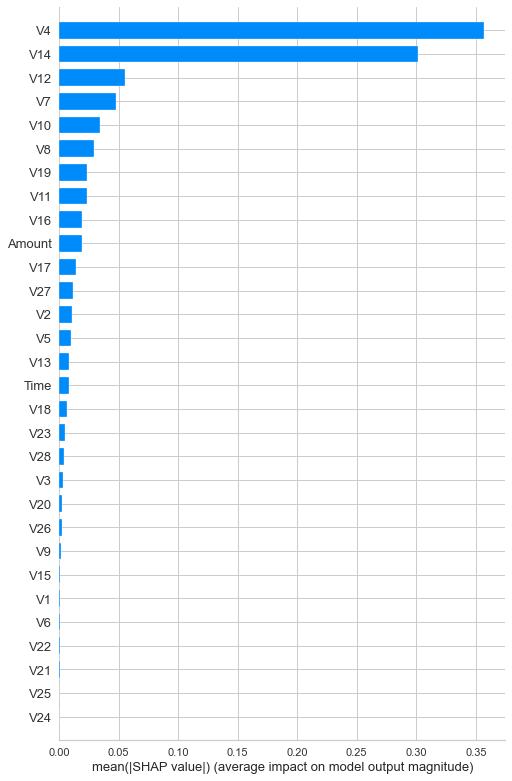

In [50]:
max_display = 30
shap.summary_plot(shap_values, df_Xtest, plot_type="bar",
                  max_display = max_display)

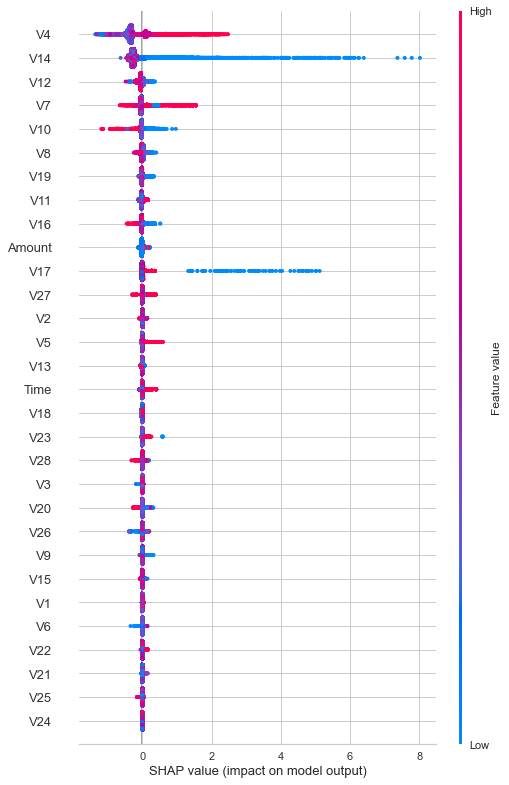

In [51]:
shap.summary_plot(shap_values, df_Xtest, plot_type='dot', max_display = max_display)

In [52]:
# Replicate Shap Importance Chart
import pprint

df_shap = pd.DataFrame(shap_values, columns = df_Xtrain.columns)
df_fimp = df_shap.abs().mean(axis = 0).sort_values(ascending = False)

print(df_fimp.head(max_display))

V4        0.357088
V14       0.301547
V12       0.055153
V7        0.048107
V10       0.034398
V8        0.029588
V19       0.023857
V11       0.023529
V16       0.019581
Amount    0.019335
V17       0.014234
V27       0.011283
V2        0.010559
V5        0.010101
V13       0.008350
Time      0.008105
V18       0.006772
V23       0.004992
V28       0.003993
V3        0.002967
V20       0.002626
V26       0.002074
V9        0.001356
V15       0.001166
V1        0.001035
V6        0.001002
V22       0.000781
V21       0.000379
V25       0.000159
V24       0.000000
dtype: float32


In [53]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

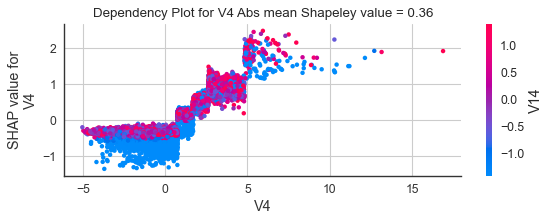

<Figure size 576x396 with 0 Axes>

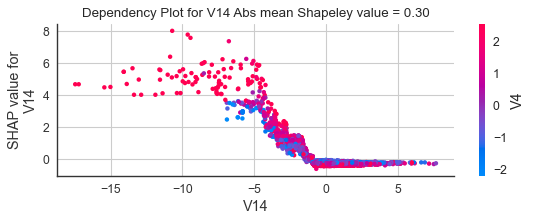

<Figure size 576x396 with 0 Axes>

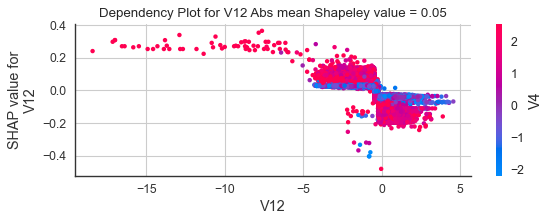

<Figure size 576x396 with 0 Axes>

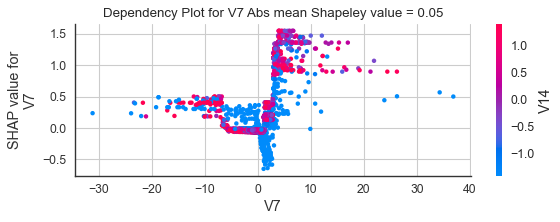

<Figure size 576x396 with 0 Axes>

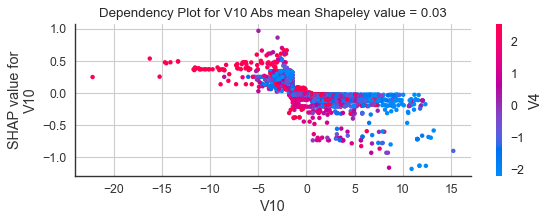

<Figure size 576x396 with 0 Axes>

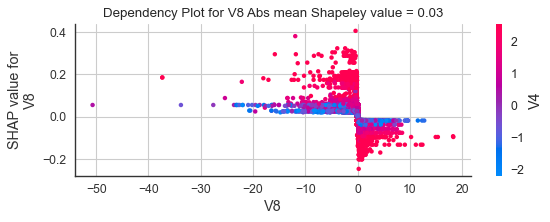

<Figure size 576x396 with 0 Axes>

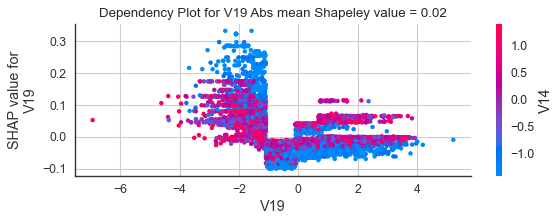

<Figure size 576x396 with 0 Axes>

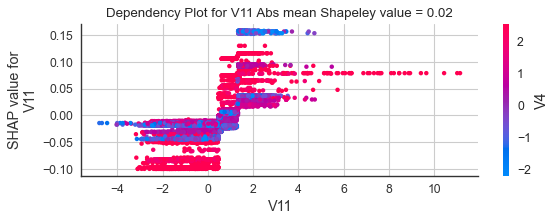

<Figure size 576x396 with 0 Axes>

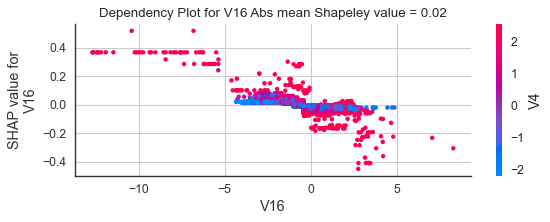

<Figure size 576x396 with 0 Axes>

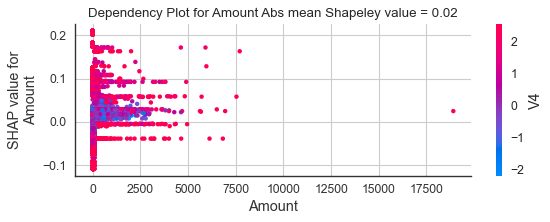

<Figure size 576x396 with 0 Axes>

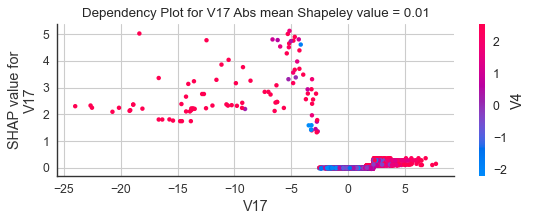

<Figure size 576x396 with 0 Axes>

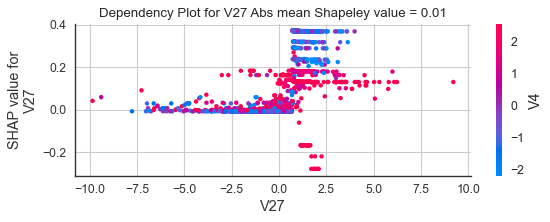

<Figure size 576x396 with 0 Axes>

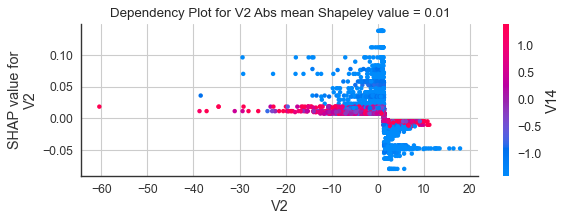

<Figure size 576x396 with 0 Axes>

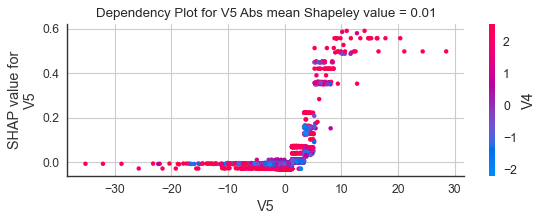

<Figure size 576x396 with 0 Axes>

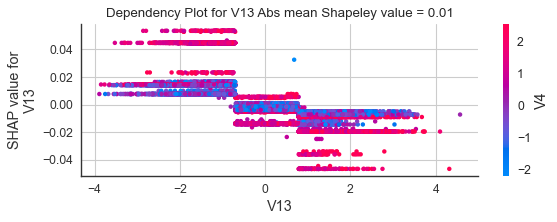

<Figure size 576x396 with 0 Axes>

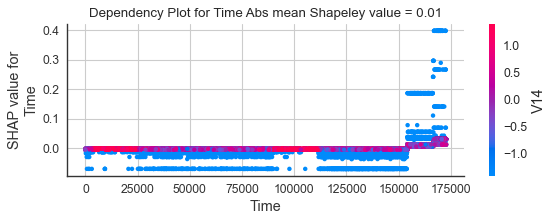

<Figure size 576x396 with 0 Axes>

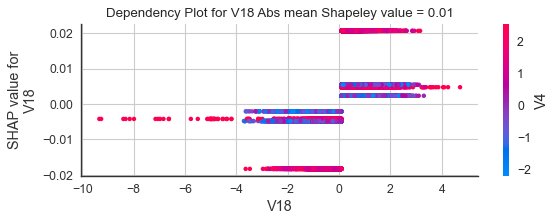

<Figure size 576x396 with 0 Axes>

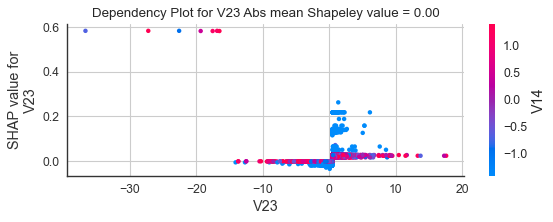

<Figure size 576x396 with 0 Axes>

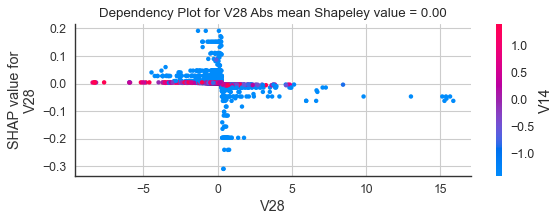

<Figure size 576x396 with 0 Axes>

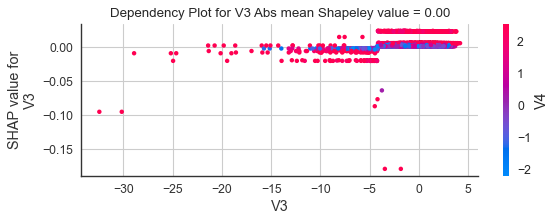

<Figure size 576x396 with 0 Axes>

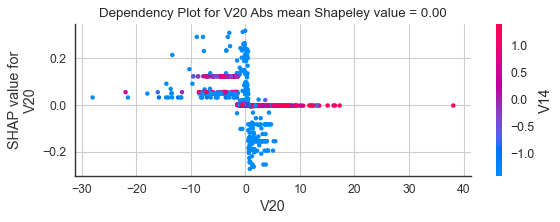

<Figure size 576x396 with 0 Axes>

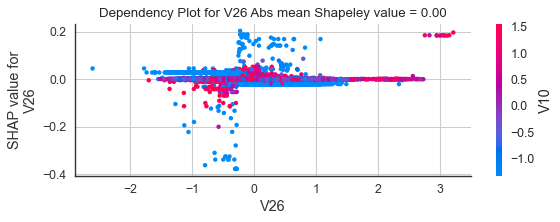

<Figure size 576x396 with 0 Axes>

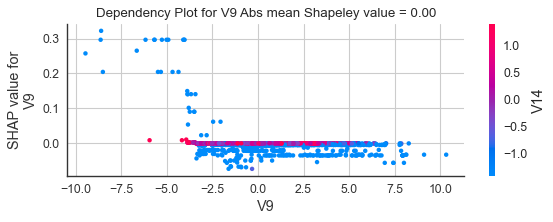

<Figure size 576x396 with 0 Axes>

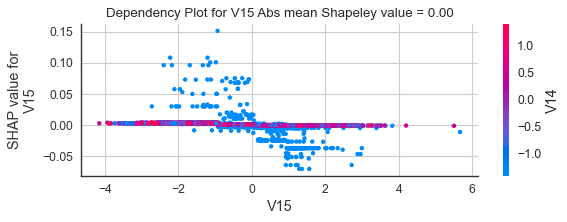

<Figure size 576x396 with 0 Axes>

invalid value encountered in true_divide
invalid value encountered in true_divide


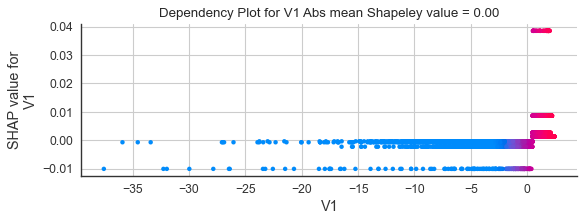

<Figure size 576x396 with 0 Axes>

invalid value encountered in true_divide
invalid value encountered in true_divide


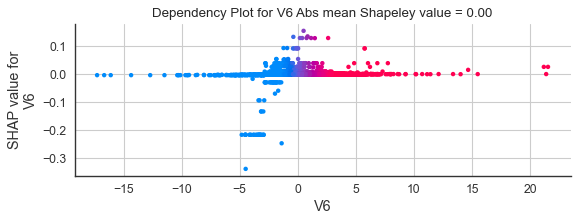

<Figure size 576x396 with 0 Axes>

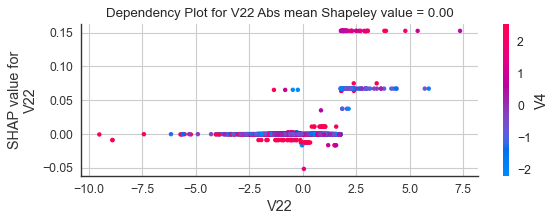

<Figure size 576x396 with 0 Axes>

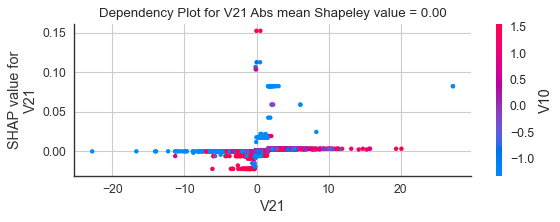

<Figure size 576x396 with 0 Axes>

invalid value encountered in true_divide
invalid value encountered in true_divide


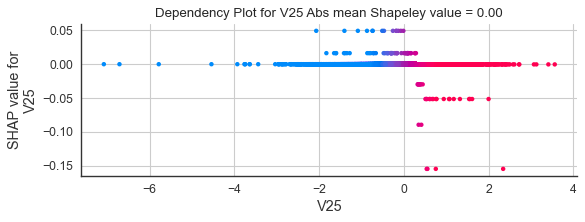

<Figure size 576x396 with 0 Axes>

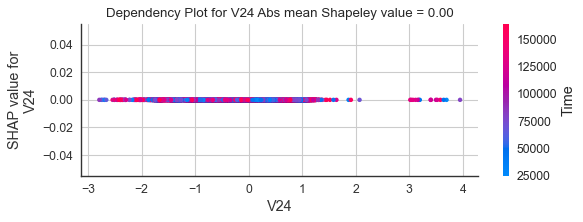

<Figure size 576x396 with 0 Axes>

In [54]:
dict_shap = (df_fimp.round(3).iloc[:max_display].to_dict())

num_subplots = len(dict_shap)
for i,v in enumerate(dict_shap):
    plt.figure(num=None, figsize=(8, 3*num_subplots),
               dpi=80, facecolor='w', edgecolor='k');
    ax1 = plt.subplot(num_subplots,1,i+1);
    
    title = f"Dependency Plot for {v.title()}"
    title += f" Abs mean Shapeley value = {dict_shap[v]:.2f}"
    
    ax1.set_title(title);
    shap.dependence_plot(v, shap_values, df_Xtest, ax = ax1)

    plt.tight_layout()
    plt.show()

In [55]:
N = 10
df_top_ytrain = ser_ytrain.reset_index().sort_values('Class',ascending=False)\
                           .head(N).reset_index(drop=True)
df_top_ytrain

index  Class
0  154694      1
1  261056      1
2  156988      1
3  150684      1
4  252774      1
5  215984      1
6  128479      1
7   69498      1
8   12369      1
9  143188      1

In [56]:
# shap_values[:N]

In [57]:
for i,v in df_top_ytrain.iterrows():
    case, result = v.to_numpy()
    print("CASE {} - Test Fraudulent".format(case))
    
    # plot force plot
    display(shap.force_plot(explainer.expected_value,
                        shap_values[i,:],
                        df_Xtest.iloc[i,:]))

CASE 154694 - Test Fraudulent


CASE 261056 - Test Fraudulent


CASE 156988 - Test Fraudulent


CASE 150684 - Test Fraudulent


CASE 252774 - Test Fraudulent


CASE 215984 - Test Fraudulent


CASE 128479 - Test Fraudulent


CASE 69498 - Test Fraudulent


CASE 12369 - Test Fraudulent


CASE 143188 - Test Fraudulent


# Model Evaluation Using Yellowbrick
- https://www.scikit-yb.org/en/latest/api/classifier/
- https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html#plotting-with-class-names

In [58]:
import yellowbrick
from yellowbrick.target import ClassBalance
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier import ConfusionMatrix

yellowbrick.__version__

'1.1'

In [59]:
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

In [60]:
# load the saved model
model = joblib.load('../outputs/clf_xgb_grid_search_optuna.pkl')

# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(model, df_Xtest, ser_ytest, cv=skf)
ypreds = ypreds_cv
ypreds[:5]

array([0, 0, 0, 0, 0])

## class balance

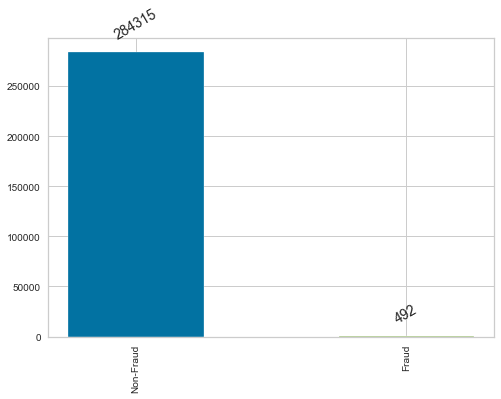

In [61]:
y = df['Class']
labels = ['Non-Fraud','Fraud']

viz = ClassBalance(labels=labels).fit(y)

bp.add_text_barplot(viz.ax)

viz.ax.set_xticks(range(len(labels)))
viz.ax.set_xticklabels(labels,rotation=90);

## Confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest,ypreds)
vals = cm.ravel()

print(cm)

print('xgboost Grid Search Results')
print('-'*25)
print('Total Frauds: ', vals[2] + vals[3])
print('Incorrect Frauds: ', vals[2])
print('Incorrect Percent: ', round(vals[2]*100/(vals[2]+vals[3]),2),'%')

[[56857     7]
 [   28    70]]
xgboost Grid Search Results
-------------------------
Total Frauds:  98
Incorrect Frauds:  28
Incorrect Percent:  28.57 %


From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.


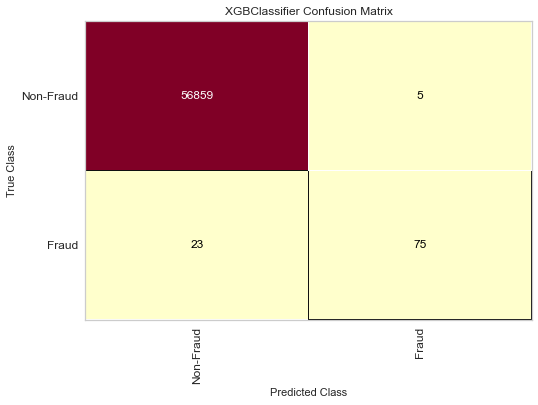

In [63]:
viz = ConfusionMatrix(model,classes=labels)
viz.fit(df_Xtrain, ser_ytrain)
viz.score(df_Xtest, ser_ytest)
viz.show()

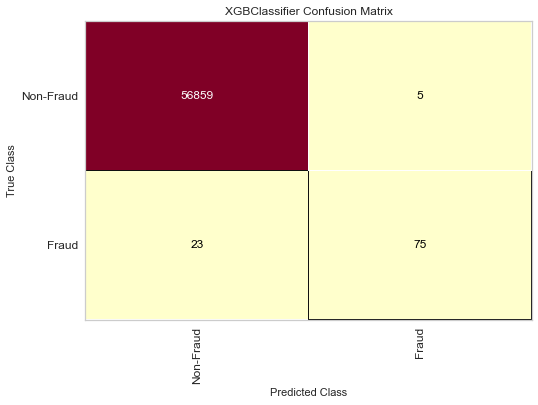

<Figure size 576x396 with 0 Axes>

In [64]:
from yellowbrick.classifier import confusion_matrix as ycm

ycm(model,
    df_Xtrain, ser_ytrain, df_Xtest, ser_ytest,
    classes=['Non-Fraud', 'Fraud']
)
plt.tight_layout();

## Classification Report Heatmap

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [66]:
print(classification_report(ytx,ypreds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.71      0.80        98

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



could not determine class_counts_ from previously fitted classifier


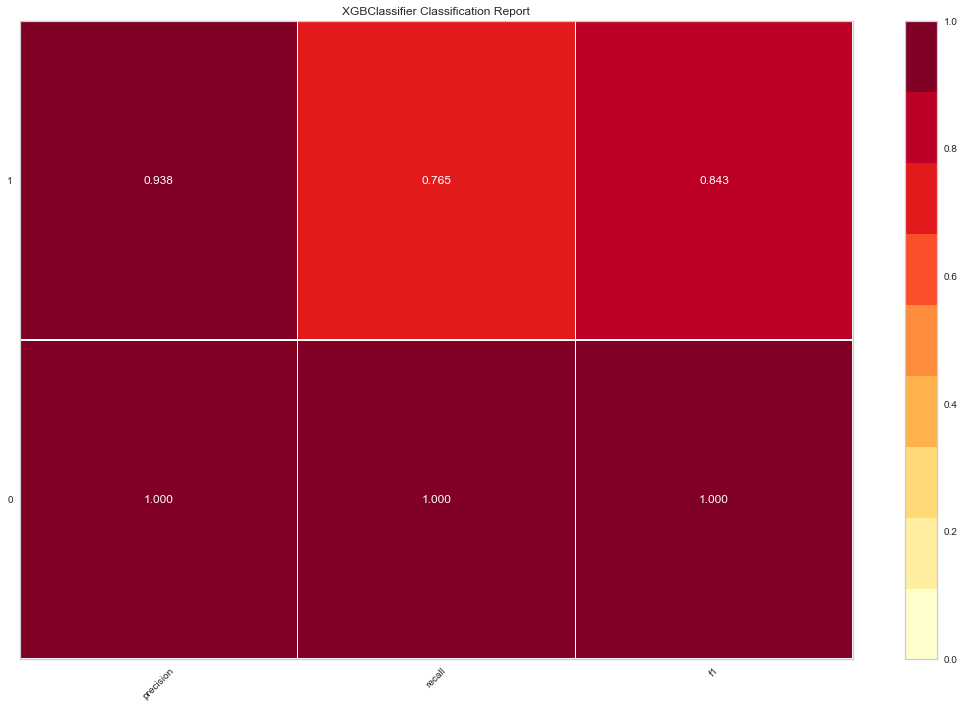

In [67]:
report = ClassificationReport(model, size=(1080, 720), labels=labels)

report.score(df_Xtest, ser_ytest)
c = report.poof()

## Class Prediction Error

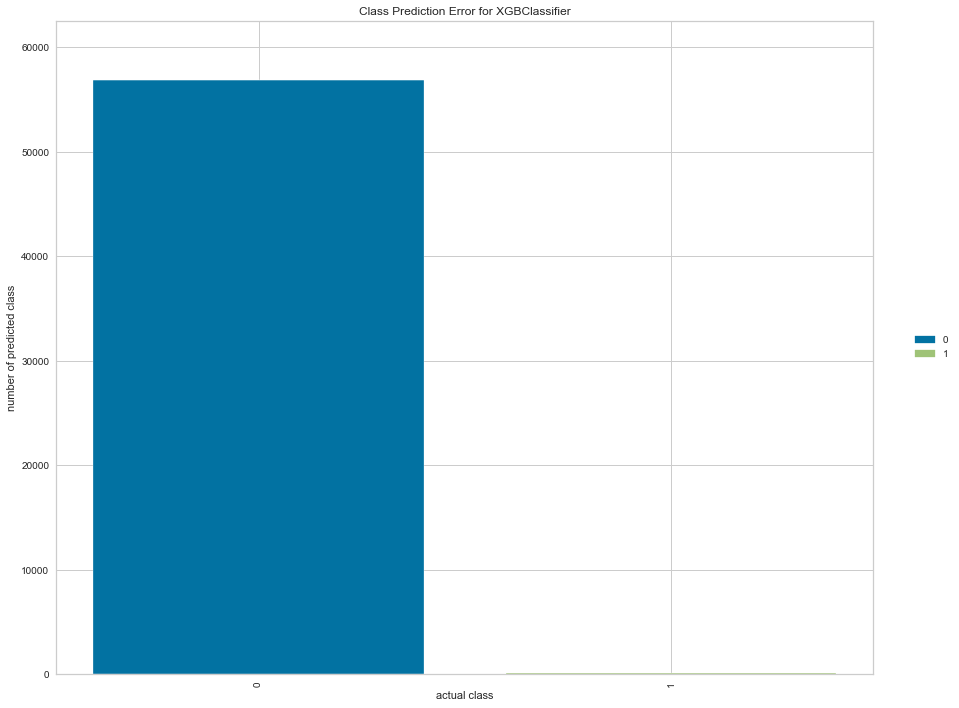

In [68]:
error = ClassPredictionError(model, size=(1080, 720), labels=labels)

error.score(df_Xtest, ser_ytest)
e = error.poof()

## ROCAUC

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
could not determine class_counts_ from previously fitted classifier


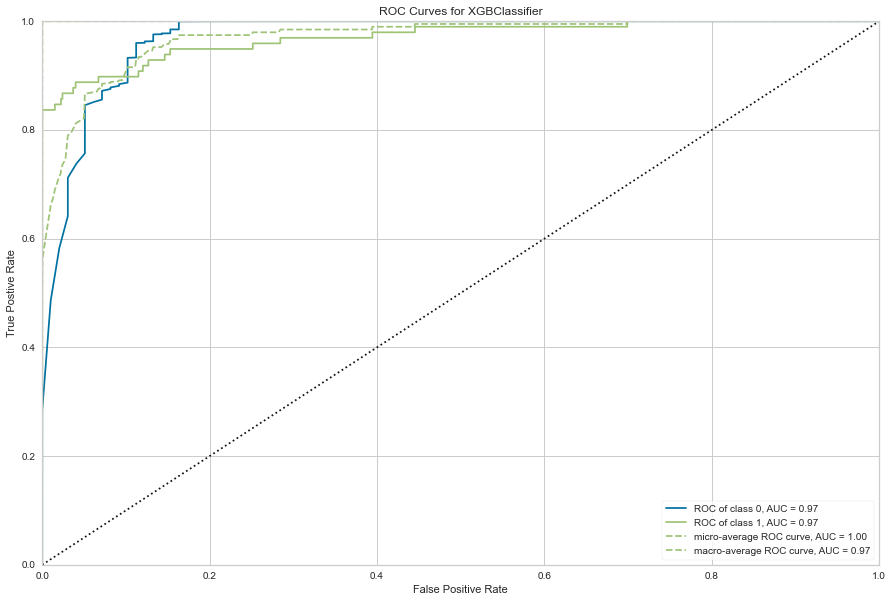

In [69]:
rocauc = ROCAUC(model, size=(1080, 720), labels=labels)

rocauc.score(df_Xtest, ser_ytest)  
r = rocauc.poof()

# Total Time Taken

In [70]:
notebook_end_time = time.time()
time_taken = time.time() - notebook_start_time
h,m = divmod(time_taken,60*60)
print('Time taken to run whole noteook: {:.0f} hr {:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole noteook: 0 hr 19 min 3 secs
